In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import scipy.io as sio
from skimage.io import imread

# Function for Assigning each training example to its closest centroid

The function findClosestCentroids classify each training example to one of the K classes (where K is the number of clusters) depending upon its closeness to each of the clusters.

In [210]:
def findClosestCentroids(X,centroids):
    k = centroids.shape[0]
    m = X.shape[0]
    idx = np.zeros((m,1)).astype(int)
    
    for i in range(m):
        indexes = np.zeros((k,1))
        for j in range(k):
            # distance between training data and the centroids
            indexes[j] = sum((X[i,:]-centroids[j,:])**2)
        
        # Idx array with values as index of mininum values of 
        idx[i] =np.argmin(indexes)
        
    return idx   

# Function for Recomputing Centroids

The function computeCentroids computes the centroids by calculating the mean of all the training examples classifies in its category.

In [168]:
def computeCentroids(X, idx, K):
    [m,n]=X.shape
    centroids = np.zeros((K,n))
    
    for i in range(K):
        ind = np.where(idx==i)
        centroids[i,:] =np.mean(X[ind[0],:],axis=0)
        
    return centroids


# K-Means Clustering Algorithms

Function runkMeans implements the K-means clustering algorithm by first using above two function and returns the final centroid locations and classes of each training example.

In [212]:
def runkMeans(X, initial_centroids, max_iters):
    [m,n]=X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    idx = np.zeros((m, 1))

    #Run K-Means
    
    for i in range(max_iters):
        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
            
        #Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)
        
    return centroids,idx


# Function for Centroid Initialization

The function kMeansInitCentroids initializes the centroids by randomly selecting K training examples.

In [199]:
def kMeansInitCentroids(X, K):
    [m,n]=X.shape
    centroids = np.zeros((K,n))
    centroids = X[np.random.permutation(m)[0:K],:]
    
    return centroids

# Main Program 

Loading and running the K-Means Clustering algorithms on data sets.

Closest centroids for the first 3 examples:
[[0 2 1]]
(the closest centroids should be 0, 2, 1 respectively)



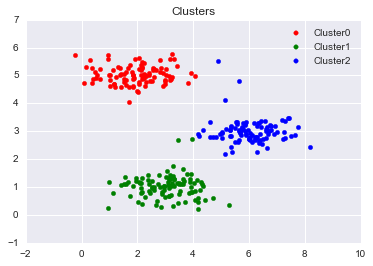

In [216]:
data2 = sio.loadmat('ex7data2.mat')
data2X = np.array(data2['X'])

# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
max_iters = 10

#Find the closest centroids for the examples using the initial_centroids
idx = findClosestCentroids(data2X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[0:3].T, end='')
print('\n(the closest centroids should be 0, 2, 1 respectively)\n')


centroids = computeCentroids(data2X,idx,K)

[centroids, idx] = runkMeans(data2X, initial_centroids, max_iters)

# Plotting the data using color coding to show the clusters each training example belongs to
color = ['r','g','b']
for i in range(3):
    plt.scatter(data2X[np.where(idx == i)[0],0], data2X[np.where(idx == i)[0],1], color = color[i], label= 'Cluster'+'%d'%i)
plt.title('Clusters')
plt.legend()

# Using the above implementation of K-Means Clustering Algorithm for Reducing the number of Colors in an image hence compressing it.

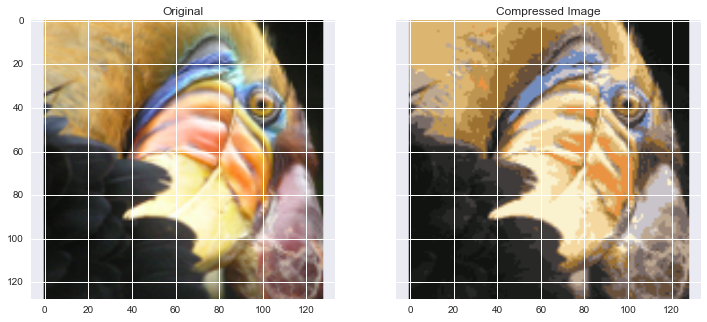

In [217]:
'''
To compress the image first run K-Means on the colors of the pixels in the image and
then map each pixel on to it's closest centroid.
'''

# Load an image of a bird
A = imread('bird_small.png')
A = A / 255.0  # Divide by 255 so that all values are in the range 0 - 1

img_size = A.shape # size of the image

'''Reshape the image into an Nx3 matrix where N = number of pixels.
Each row will contain the Red, Green and Blue pixel values.
This gives us our dataset matrix X that we will use K-Means on.
'''

X = A.reshape(img_size[0]*img_size[1], 3)

# Run your K-Means algorithm on this data
K = 16
max_iters = 10

initial_centroids = kMeansInitCentroids(X, K) # randomly initializing the centroids

# Run K-Means and getting the final centroids and class of each pixel
[centroids, idx] = runkMeans(X, initial_centroids, max_iters)

# ================= Image Compression ======================

'''Recovering the image from the indices (idx) by mapping each pixel 
(specified by it's index in idx) to the centroid value '''

X_recovered1 = centroids[idx,:]

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered1.reshape(img_size) # Compressed image array

# Displaying Original and Compressed Image side-by-side

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,5))
ax1.imshow(A)
ax1.set_title('Original')
ax2.imshow(X_recovered)
ax2.set_title('Compressed Image')

